In [1]:
"""
Plot PCA analyses (Figure 5)
"""

import matplotlib.pyplot as plt
import os, sys
import numpy as np
from matplotlib import cm
from copy import deepcopy
import matplotlib.lines as mlines
from sklearn import decomposition

##%% paths
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code', 'analysis_code'))
import load_activations
import plot_utils
colors_main, colors_sf = plot_utils.get_cmaps_biasCNN()

figfolder = os.path.join(root,'figures','pca')

In [12]:
# Parameters

model_name='vgg16'
dataset_name='FiltIms14AllSFCos_rand1'
info=load_activations.get_info(model_name, dataset_name)

# which layer?
ll=0  # loading just one layer at a time - 0, 6, 12, 18 are inds of the ones i looked at for figure.
color_ind=1

training_str='pretrained'
param_str='params1'
ckpt_str='0'

# extract some things from info
layers2load=info['layer_labels_full']  
layer_labels=info['layer_labels']  
nLayers = info['nLayers']
orilist = info['orilist']
sflist = info['sflist']

if info['nPhase']==1:
  nOri=180
  orilist_adj = orilist
else:
  nOri=360
  orilist_adj = deepcopy(orilist)
  phaselist = info['phaselist']
  orilist_adj[phaselist==1] = orilist_adj[phaselist==1]+180
  
ori_axis = np.arange(0, nOri,1)
nSF = np.size(np.unique(sflist))

In [13]:
#%% load activations, for the layer specified in code above.

ckpt_dirs = os.listdir(os.path.join(root,'activations',model_name,training_str,param_str,dataset_name))
ckpt_dirs = [dd for dd in ckpt_dirs if 'eval_at_ckpt-%s'%ckpt_str[0:2] in dd and '_reduced' in dd]
nums=[dir[np.char.find(dir,'-')+1:np.char.find(dir,'_reduced')] for dir in ckpt_dirs]           
ckpt_str=nums[0] 
activ_path = os.path.join(root,'activations',model_name,training_str,param_str,dataset_name,'eval_at_ckpt-%s_reduced'%ckpt_str)

fn = os.path.join(activ_path,'allStimsReducedWts_%s.npy'%layers2load[ll])
print('loading reduced activations from %s\n'%fn)
allw = np.load(fn)
nfeat = np.shape(allw)[1]

nEx=48

tfs_mean = np.zeros([nOri, nfeat])
tfs_reshaped = np.zeros([nOri, nEx, nfeat])
tf_var = np.zeros([nOri, nfeat])

for oo in range(nOri):
  inds = np.where(orilist==oo)[0]
  tfs_reshaped[oo,:,:] = allw[inds,:]
  tfs_mean[oo,:] = np.mean(allw[inds,:],axis=0)
  tf_var[oo,:] = np.var(allw[inds,:],axis=0)


loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/activations/vgg16/pretrained/params1/FiltIms14AllSFCos_rand1/eval_at_ckpt-0_reduced/allStimsReducedWts_vgg_16_conv1_conv1_1.npy



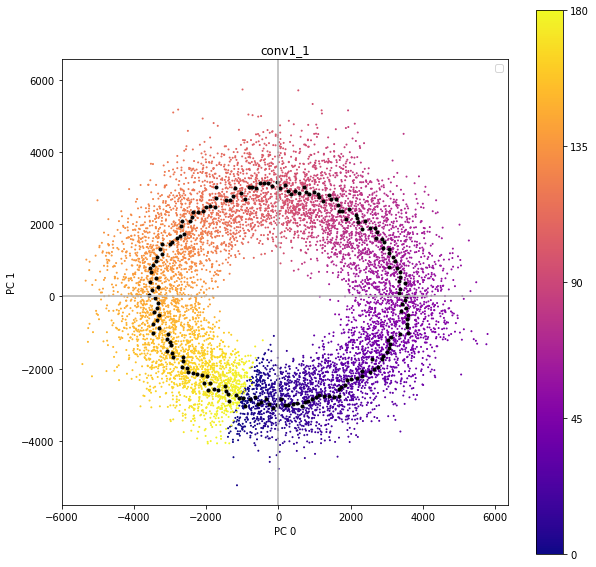

In [14]:
#%% Make scatter plot of individual image responses, where color=orientation. 

# Figure 5A

plt.rcParams['ps.fonttype']=42    
plt.rcParams['figure.figsize']=[10,10]
plt.close('all')
plt.figure();

pc2plot = [0,1]
ori4leg = np.arange(0,nOri,45)
ori2plot = np.arange(0,nOri,1)

c_map = cm.get_cmap('plasma')
oricolors = c_map(np.linspace(0,1,len(ori2plot)))
lh=[]
markers = ['^','+','o','p','*','3']

for oo in range(len(ori2plot)):
  
  xdat=tfs_reshaped[ori2plot[oo],:,pc2plot[0]]
  ydat=tfs_reshaped[ori2plot[oo],:,pc2plot[1]]
  sc = plt.scatter(xdat,ydat,s=1*np.ones(np.shape(xdat)),
                         c=ori2plot[oo]*np.ones(np.shape(xdat)),
                         vmin = 0,vmax = 180, cmap=c_map,marker=markers[2])
  plt.plot(np.mean(xdat),np.mean(ydat),'.',color='k')

plt.axvline(0,color=[0.7, 0.7, 0.7])
plt.axhline(0,color=[0.7, 0.7, 0.7])
plt.colorbar(sc,ticks=[0,45,90,135,180])  
plt.xlabel('PC %d'%pc2plot[0])
plt.ylabel('PC %d'%pc2plot[1])
plt.axis('square')
plt.title(layer_labels[ll])
plt.legend(lh,['%d deg'%oo for oo in ori4leg])
figname = os.path.join(figfolder, 'pc01_%s.pdf'%layer_labels[ll])
plt.savefig(figname, format='pdf',transparent=True)


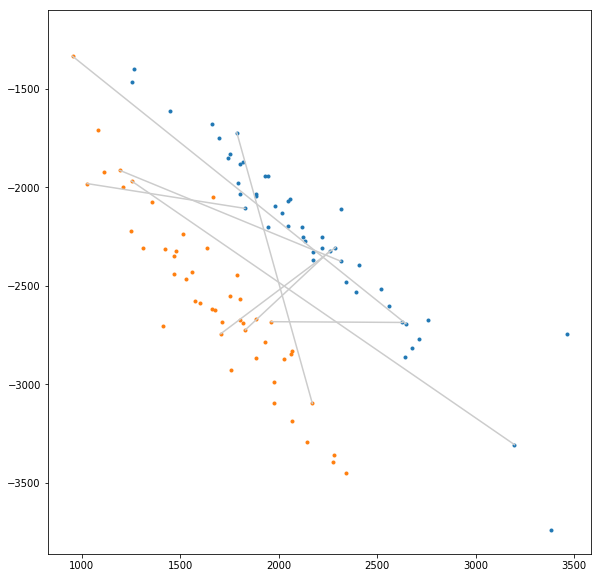

In [16]:
#%% plot an example of "point clouds" used to get my t-statistic. 

# Figure S2B
  
plt.close('all')
plt.figure();
pcpair1=[0,1]
ncomp2use=5
oo1=30
oo2=25
dat1 = tfs_reshaped[oo1,:,0:ncomp2use]
dat2 = tfs_reshaped[oo2,:,0:ncomp2use]
plt.plot(dat1[:,pcpair1[0]],dat1[:,pcpair1[1]],'.')
plt.plot(dat2[:,pcpair1[0]],dat2[:,pcpair1[1]],'.')
for ii in range(8):
  xvals = np.asarray([dat1[ii,pcpair1[0]],dat2[ii,pcpair1[0]]])
  yvals = np.asarray([dat1[ii,pcpair1[1]],dat2[ii,pcpair1[1]]])
  plt.plot(xvals, yvals,color = [0.8, 0.8, 0.8])
  
  
plt.axis('square')
figname = os.path.join(figfolder, 'tstat_example.pdf')
plt.savefig(figname, format='pdf',transparent=True)


loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/activations/vgg16/pretrained/params1/FiltIms14AllSFCos_rand1/eval_at_ckpt-0_reduced/allStimsReducedWts_vgg_16_conv1_conv1_1.npy

loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/activations/vgg16/pretrained/params1/FiltIms14AllSFCos_rand1/eval_at_ckpt-0_reduced/allStimsReducedWts_vgg_16_conv3_conv3_1.npy

loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/activations/vgg16/pretrained/params1/FiltIms14AllSFCos_rand1/eval_at_ckpt-0_reduced/allStimsReducedWts_vgg_16_conv4_conv4_3.npy

loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/activations/vgg16/pretrained/params1/FiltIms14AllSFCos_rand1/eval_at_ckpt-0_reduced/allStimsReducedWts_vgg_16_fc6.npy



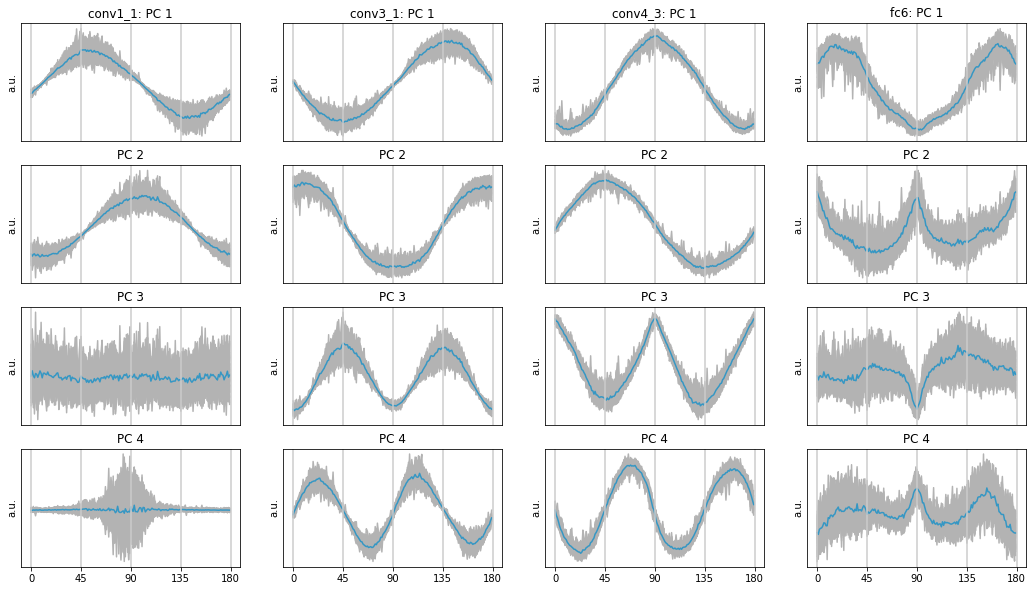

In [17]:
#%% plot orientation tuning profiles of first four PCs

# Figure 5B

plt.rcParams['figure.figsize']=[18,10]
plt.close('all')
plt.figure();
layers2plot = np.asarray([0,6,12,18])
ncomp2plot = 4
for ll in range(len(layers2plot)):
  fn = os.path.join(activ_path,'allStimsReducedWts_%s.npy'%layers2load[layers2plot[ll]])
  print('loading reduced activations from %s\n'%fn)
  allw = np.load(fn)
  nfeat = np.shape(allw)[1]
  
  
  tfs_mean = np.zeros([nOri, nfeat])
  tfs_reshaped = np.zeros([nOri, nEx, nfeat])
 
  for oo in range(nOri):
    inds = np.where(orilist==oo)[0]
    tfs_reshaped[oo,:,:] = allw[inds,:]
    tfs_mean[oo,:] = np.mean(allw[inds,:],axis=0)
  
  
  for uu in range(ncomp2plot):
    plt.subplot(ncomp2plot,len(layers2plot),4*uu+ll+1)
    plt.plot(ori_axis, tfs_reshaped[:,:,uu],color=[0.7, 0.7, 0.7])
    plt.plot(ori_axis, tfs_mean[:,uu],color=colors_main[color_ind,:])
    if uu==0:
      plt.title('%s: PC %d'%(layer_labels[layers2plot[ll]],uu+1))
    else:
      plt.title('PC %d'%(uu+1))
    if uu==ncomp2plot-1:
      plt.xticks(np.arange(0,181,45))
    else:
      plt.xticks([])
      
    for xx in np.arange(0,181,45):
      plt.axvline(xx,color=[0.8, 0.8, 0.8])
    plt.yticks([])
    plt.ylabel('a.u.')
#    plt.suptitle(layer_labels[ll])
figname = os.path.join(figfolder, 'pc1-4lines_severallayers.pdf')
plt.savefig(figname, format='pdf',transparent=True)


loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv1_1_all_responsive_units_eval_at_ckpt_00000.npy

running pca...

loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv3_1_all_responsive_units_eval_at_ckpt_00000.npy

running pca...

loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv4_3_all_responsive_units_eval_at_ckpt_00000.npy

running pca...

loading reduced activations from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/fc6_all_responsive_units_eval_at_ckpt_00000.npy

running pca...



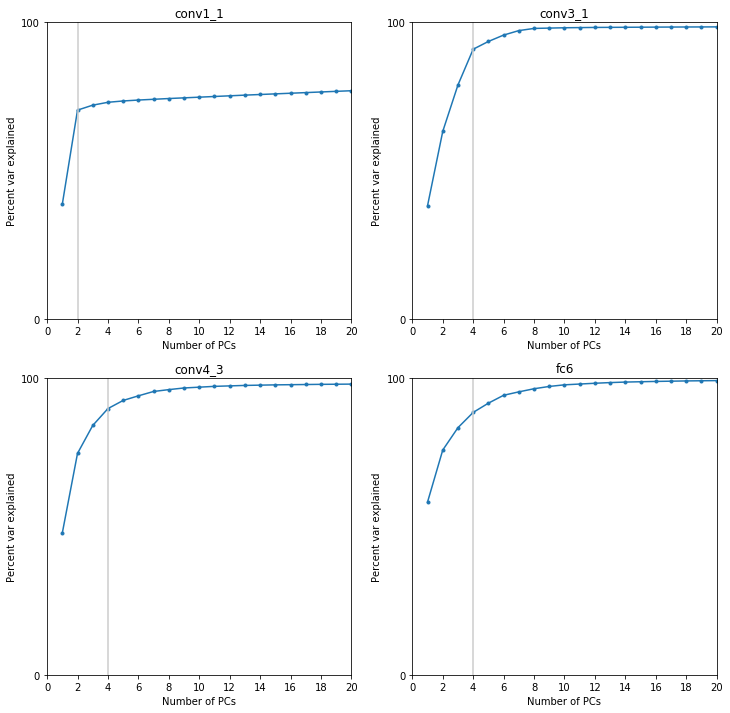

In [18]:
# %% Estimate the dimensionality of each layer's orient representations, 
# by performing PCA on the mean responses to each orient.
# This will use ALL the units at each layer (except any that were not orientation-responsive at all, e.g. constant or zero resp)
# load the "Average tuning curve" for each unit, which is its average resp to all orients.
# this takes a long time to run.

# Figure 5C

plt.rcParams.update({'font.size': 10})
ncomp_all = np.zeros([nLayers,1])
min_incr = 0.05
plt.close('all')
fig = plt.figure();
layers2plot = np.asarray([0,6,12,18])
#layers2plot = np.asarray([])
npx = np.ceil(np.sqrt(np.size(layers2plot)))
npy = np.ceil(np.size(layers2plot)/npx)
nImageSets=1
dataset_root = 'FiltIms14AllSFCos'

xax = np.arange(1,181,1)

for ll in range(len(layers2plot)):
  
  plt.subplot(npx,npy, ll+1)
  
  
  activ_path = os.path.join(root,'saved_analyses','unit_tuning',model_name,training_str,param_str,dataset_root)
  

  fn = os.path.join(activ_path,'%s_all_responsive_units_eval_at_ckpt_%s0000.npy'%(layer_labels[layers2plot[ll]],ckpt_str))
  print('loading reduced activations from %s\n'%fn)
  alltfs = np.load(fn)
  nfeat = np.shape(allw)[1]
  
  for kk in range(nImageSets):
    
    tfs_mean = np.transpose(alltfs[kk,:,0,:])
  
    nEx=48
    pca = decomposition.PCA()
    w = tfs_mean
    
    print('running pca...\n')
    weights_reduced = pca.fit_transform(w) 
    comp = pca.components_
    # decide how many components needed - based on where additional components explain <5% addit variance.
    var_expl = pca.explained_variance_ratio_   
    cumvar = np.cumsum(var_expl)*100
    ncomp2keep = np.where(var_expl<min_incr)[0][0]-1
    
    ncomp_all[ll] = ncomp2keep
    
   
    plt.plot(xax, cumvar,marker='.')
  plt.axvline(xax[ncomp2keep], color=[0.8, 0.8, 0.8])
  plt.xlim([0,20])
  plt.yticks([0,100])
  plt.ylabel('Percent var explained')
  plt.xlabel('Number of PCs')
  plt.xticks([0,10,20])
  plt.ylim([0,100])
  plt.xticks(np.arange(0,21,2))
  
  plt.title('%s'%(layer_labels[layers2plot[ll]]))


fig.set_size_inches(12,12) 
figname = os.path.join(figfolder, 'Dims_all.pdf')
plt.savefig(figname, format='pdf',transparent=True)

